<a href="https://colab.research.google.com/github/Yikang1020/Joint_modeling/blob/main/Jointmodeling2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural submodel

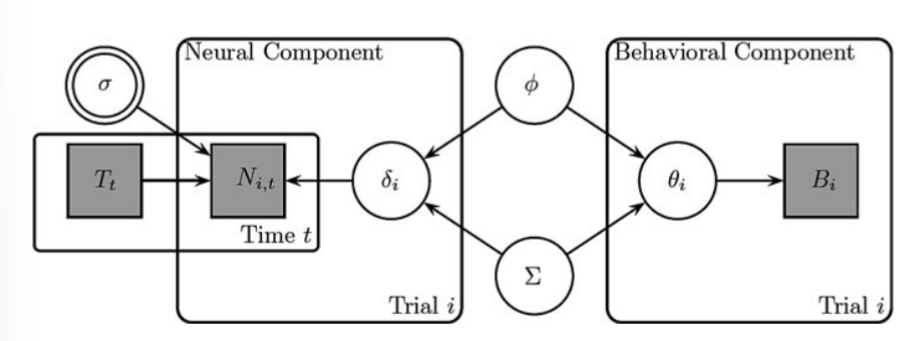

$T=[0,1,2,3,4]$

$N_{i,t}$ is the BOLD on every trial i in time t of  ROI.

$N_{i,t}=T_t*δ_i$ 


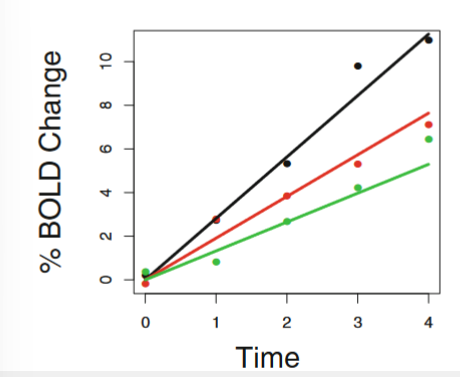

$N_{i,j}=T_t*\delta_i + \epsilon_i$

$\epsilon_i \sim N(0, \sigma)$

$N_{i,t} \sim N(T_t*\delta_i, \sigma)$

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# seed random seed
np.random.seed(123)

In [ ]:
# set five time points
T=np.array([[0,1,2,3,4]])

# set three slope
delta=np.array([[0.5,1,2]])

In [ ]:
# the ideal neural data is time dot slope
N_hat = T.T@delta

# In reality, neural data contains noise
N = N_hat + np.random.normal(0,1,[5,3])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

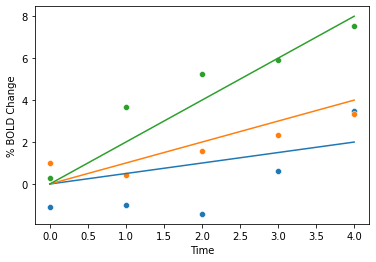

In [ ]:
plt.figure()

# set the title of axis
plt.xlabel('Time')
plt.ylabel('% BOLD Change');

# plot the predictor of nerual data
sns.lineplot(T[0],N_hat[:,0])
sns.lineplot(T[0],N_hat[:,1])
sns.lineplot(T[0],N_hat[:,2])

# plot the true value of neural data
sns.scatterplot(T[0],N[:,0])
sns.scatterplot(T[0],N[:,1])
sns.scatterplot(T[0],N[:,2])

## Behavioral submodel

the degree of 'familiarity' with the item is represented by parameter $\theta_i$.

$p(old|item i)=(logit^{-1}(\theta_i))$

$logit(x)=log(\frac{x}{1-x})$

$(0,1) \rightarrow (-\infty , +\infty) $

$logit^-1(x)=(\frac{1}{1+exp(-x)})$

$(-\infty , +\infty) \rightarrow (0,1) $


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


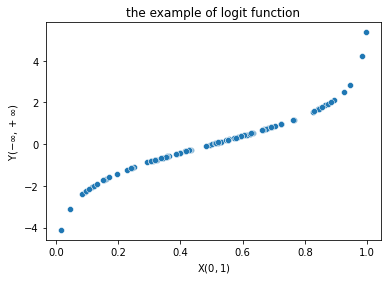

In [ ]:
# test the logit function 
x = np.random.uniform(0,1,100) 
log_x = np.log(x/(1-x))

# set the title
plt.title('the example of logit function')
plt.xlabel('X$(0,1)$')
plt.ylabel('Y$(-\infty,+\infty)$');
sns.scatterplot(x,log_x)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


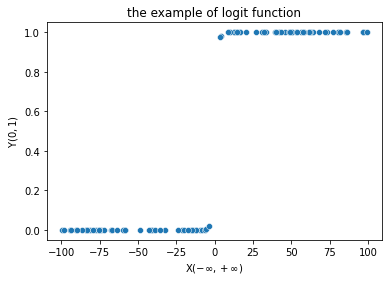

In [ ]:
# test the inv_logit function 
x = np.random.uniform(-100,100,100) 
inv_log_x = 1/(1+np.exp(-x))

# set the title
plt.title('the example of logit function')
plt.xlabel('X$(-\infty,+\infty)$')
plt.ylabel('Y$(0,1)$');
sns.scatterplot(x,inv_log_x)

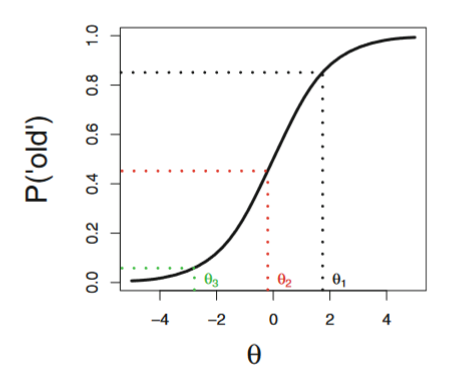

the degree of 'familiarity' with the item is represented by parameter $\theta_i$.

$p(old|item i)=(logit^{-1}(\theta_i))$

$B_i \sim Bernoulli((p(old|item_i))$

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


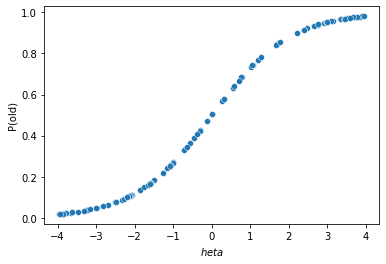

In [ ]:
# set a series of parameters
theta = np.random.uniform(-4,4,100)
# calculate the invlogit of theta
p_old_item = 1/(1+np.exp(-theta))
# set the title
plt.xlabel('$\theta$')
plt.ylabel('P(old)');
sns.scatterplot(theta, p_old_item)

## link function


$(\theta,\delta)\sim M(\Omega)$

we assumed M to be a multivariate normal distribution.

$\phi$ is mean vector, $\Sigma$ is variance covariance matrix，$\Omega = {\phi,\Sigma}$

$N_p(a,b)$ denotes a multivariable normal distribution of dimension $p = length(\theta)+length(\delta))$

### multivariable normal distribution

$[\frac{\theta}{\delta}] \sim N_p(\phi = [\frac{\phi_1}{\phi_2}], \Sigma = 
\left[
\begin{array}{l|l}
\Sigma_{1,1} & \Sigma_{1,2} \\
\hline \Sigma_{2,1} & \Sigma_{2,2}
\end{array}
\right])$

marginal distributuion

$\theta \sim N_{p1}(\phi_1,\Sigma_{1,1})$

$\theta \sim N_{p2}(\phi_2,\Sigma_{2,2})$

conditional distributuion

$\theta|\delta = \delta^* \sim N_p(\phi_{1|2},\Sigma_{1,1|2})$

???

$\phi_{1|2}=\phi_{1}+\Sigma_{1,2}\Sigma^{-1}_{2,2}(\delta^* - \phi_2)$

$\Sigma_{1,1|2}=\Sigma_{1,1}-\Sigma_{1,2}\Sigma^{-1}_{2,2}\Sigma_{2,1}$


$\phi={\delta_{\mu},\theta_{\mu}}$

$\Sigma = \left[
\begin{array}{l|l}
\delta_{\sigma}^2 & \rho\delta_{\sigma}\theta_{\sigma} \\
\hline (\rho\delta_{\sigma}\theta_{\sigma})^T & \theta_{\sigma}^2
\end{array}
\right])$

## Simulate data

In [ ]:
# set up model specification
n=500 # total number of trials

# establish the hyperparameters
sig1=0.5 # std. dev. of single-trial BOLD responses
sig2=1 # std. dev. of item memory strength
rho=0.6 # cor brain activation and memory strength

sigma = np.matrix([[sig1**2,sig1*sig2*rho],
           [sig1*sig2*rho,sig2**2]])
phi=[2,0]
DeltaTheta = np.random.multivariate_normal(phi,sigma,n)

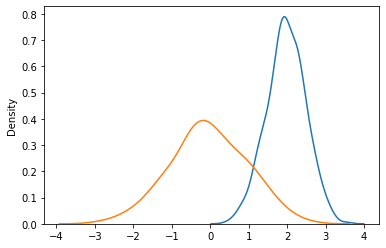

In [ ]:
# the kdeplot of delta
sns.kdeplot(DeltaTheta[:,0])
# the kdeplot of theta
sns.kdeplot(DeltaTheta[:,1])

In [ ]:
# generate observed variable nodes
ts = np.arange(0,4,1) # scan times
sig = 0.5 # the std. dev. of BOLD responses

# declare some storage objects
N = np.full((n,len(ts)),np.nan)
B = np.full(n,np.nan)

# loop over trials
for i in range(n):
  # N is a normal deviate with mean controlled by delta
  N[i,:] = np.random.normal(DeltaTheta[i,0]*ts,sig)
  # B is a Bernoulli deviate with probability controlled by theta
  B[i] = np.random.binomial(n = 1,p=1/(1+np.exp(-DeltaTheta[i,1])),size = 1)

## Infer model

Neural likelihood

$N_{i,t} \sim N(T_t\delta_i,\sigma)$

$p(N_{i,t}|\delta_{i})=\frac{1}{\sqrt{2\pi\sigma^2}}exp(\frac{[Ni,t - T_t\delta_i]^2}{2\sigma^2})$

$L(\delta|N)=\prod_{t}\prod_{i}p(N_{i,t}|\delta_{i})=(\frac{1}{\sqrt{2\pi\sigma^2}})^{nt}\prod_{t}\prod_{i}exp(\frac{[Ni,t - T_t\delta_i]^2}{2\sigma^2})$

Behavioral likelihood

$p(B_i|\theta_i)=(logit^{-1}(\theta_i))^{B_i}(1-logit^{-1}(\theta_i))^{1-B_i}$

$L(\theta|B)p(B_i|\theta_i)=(logit^{-1}(\theta_i))^{B_i}(1-logit^{-1}(\theta_i))^{1-B_i}$

Linking structure

$z_i=(\theta_i,\delta_i)$

$p(\theta_i,\delta_i|\phi,\Sigma)=\frac{1}{\sqrt{2\pi\left | \Sigma \right | }}exp(-\frac{1}{2}[\phi-z_i]^T\Sigma^{-1}[\phi-z_i])$

Priors on hyperparameters

$p(\Omega)=p(\phi,\Sigma)=p(\phi|\Sigma)p(\Sigma)$

$\phi|\Sigma \sim N_p(\phi_0,s_0\Sigma)$

$\Sigma \sim W^{-1}(I_0,n_0)$

fit model

$p(\theta,\delta,\phi,\Sigma|N,B) \propto L(\theta|B)L(\delta|N)p(\theta,\delta|\phi,\Sigma)p(\phi|\Sigma)p(\Sigma) $

In [ ]:
!lsb_release -a
!pwd

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.6 LTS
Release:	18.04
Codename:	bionic
/content


In [ ]:
!sudo apt-get update
!sudo apt-get install jags

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://ppa.launchpad.ne

In [ ]:
!which jags

/usr/bin/jags


In [ ]:
import os
os.system("TEMP_DEB='$(mktemp)' ")
os.system("wget -O '$TEMP_DEB' 'https://launchpad.net/~cidlab/+archive/ubuntu/jwm/+files/jags-wiener-module_1.1-5_amd64.deb'")
os.system("sudo dpkg -i '$TEMP_DEB'")
os.system("rm -f '$TEMP_DEB'")

0

In [ ]:
!jags

Welcome to JAGS 4.3.0 on Tue Dec 27 09:46:32 2022
JAGS is free software and comes with ABSOLUTELY NO WARRANTY
Loading module: basemod: ok
Loading module: bugs: ok
. ^C


In [ ]:
!pip install pyjags

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 184 kB 33.8 MB/s 
  Created wheel for pyjags: filename=pyjags-1.3.8-cp38-cp38-linux_x86_64.whl size=1075400 sha256=a37e8dcb6dae6a6ac175221c2bb6d23f9ee327bfe9e89362f307e550fe4ca221
  Stored in directory: /root/.cache/pip/wheels/56/89/b1/3f58a1929cdf9db4aaecab46a4eb863bec4336d09b69dfd587
Successfully built pyjags


In [ ]:
import pyjags

## model1

In [ ]:
tojags='''
model{
  # convert sig to tau for convenience
  tau <- pow(sig, -2)
  # loop through trials to define likelihood
  for (i in 1:n){
    for (t in 1:Nt){
      # likelihood for neural data
      N[i,t] ~ dnorm(DeltaTheta[i,1]*ts[t],tau); 
    }
    # likelihood for behavioral data
    B[i] ~ dbin(1/(1+exp(-DeltaTheta[i,2])),1);
  } 
  # loop through trials to define prior on (delta, theta)
  for (i in 1:n){
    DeltaTheta[i,1:2] ~ dmnorm(phi,Omega);
  }
  # priors on hyperparameters
  phi ~ dmnorm(phi0,s0);
  Omega ~ dwish(I0,n0);
  # convert Omega to Sigma for convenience
  Sigma <- inverse(Omega);
}
'''

In [ ]:
modelfile = '/content/simpleCPP_test1.jags'
f = open(modelfile, 'w')
f.write(tojags)
f.close()

In [ ]:
trackvars = ['phi','Sigma','DeltaTheta']

In [ ]:
jags = pyjags.Model(file=modelfile,
           data=dict(n=n,
                B=B,
                N=N,
                ts=ts,
                Nt=len(ts),
                sig=sig,
                I0=np.diag(np.ones(2) * 2),
                n0=2,
                phi0=[0]*2,
                s0=np.diag(np.ones(2) * 2)),
           chains=1,
           adapt=1000, 
           threads=6,
           progress_bar=True
           )
samples = jags.sample(20000,vars=trackvars,thin=10)

adapting: iterations 1000 of 1000, elapsed 0:00:01, remaining 0:00:00
sampling: iterations 5503 of 20000, elapsed 0:00:08, remaining 0:00:20
sampling: iterations 12769 of 20000, elapsed 0:00:18, remaining 0:00:10
sampling: iterations 19994 of 20000, elapsed 0:00:29, remaining 0:00:00
sampling: iterations 20000 of 20000, elapsed 0:00:29, remaining 0:00:00


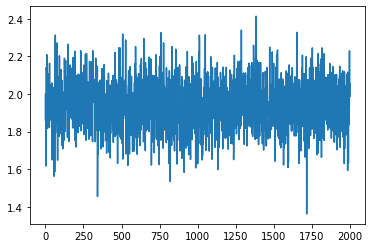

In [ ]:
# plot the trace
sns.lineplot(range(2000),samples['DeltaTheta'][0,0,:,0])

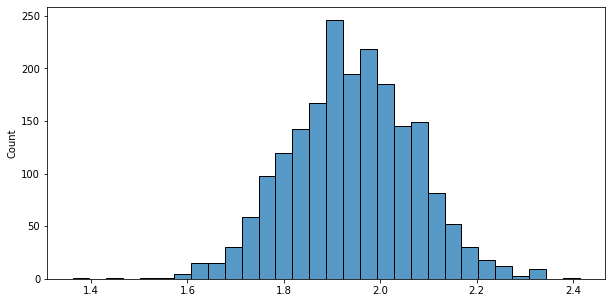

In [ ]:
# plot the posterior
sns.histplot(samples['DeltaTheta'][0,0,:,0],bins=30)

In [ ]:
print(samples['DeltaTheta'].shape)
print(samples['phi'].shape)
print(samples['Sigma'].shape)

(500, 2, 2000, 1)
(2, 2000, 1)
(2, 2, 2000, 1)


In [ ]:
# average Delta of 200 samples
delta = np.mean(samples['DeltaTheta'][:,0,:,0],axis=1)
# average theta of 200 samples
theta = np.mean(samples['DeltaTheta'][:,1,:,0],axis=1)
# average phi of 200 samples
phi1 = np.mean(samples['phi'][0,:,0],axis=0)
phi2 = np.mean(samples['phi'][1,:,0],axis=0)
# average Delta of 200 samples
Sigma = np.mean(samples['Sigma'][:,:,:,0],axis=2)

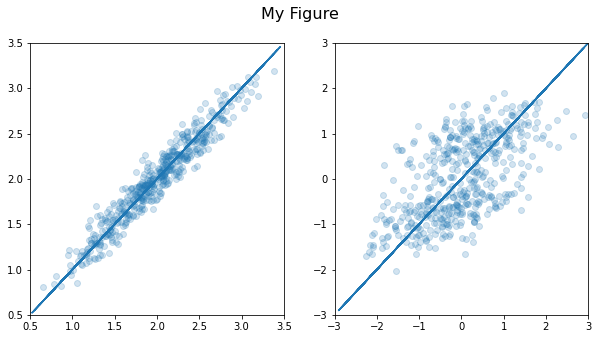

In [ ]:
# Set the default figure size
plt.rcParams["figure.figsize"] = (10, 5)
# Create a figure with one row and two columns
fig, axs = plt.subplots(1,2)
# Plot the scatter in the first subplot
axs[0].scatter(DeltaTheta[:,0],delta,alpha=0.2)
# Plot the line in the first subplot
x=np.random.uniform(0.5,3.5,100)
axs[0].plot(x,x)
# Adjust the range of the x-axis and y-axis for the first figure
axs[0].set_xlim(0.5,3.5)
axs[0].set_ylim(0.5,3.5)

# Plot the scatter in the second subplot
axs[1].scatter(DeltaTheta[:,1],theta,alpha=0.2)
# Plot the line in the second subplot
x=np.random.uniform(-3,3,100)
axs[1].plot(x,x)

# Adjust the range of the x-axis and y-axis for the second figure
axs[1].set_xlim(-3,3)
axs[1].set_ylim(-3,3)
# Add a title to the entire figure
fig.suptitle("My Figure",fontsize=16)
# Show the plot
plt.show()


In [ ]:
# posterior of phi
phi1 = samples['phi'][0,:,0]
phi2 = samples['phi'][1,:,0]

# posterior of sigma,rho
sig1 = np.sqrt(samples['Sigma'][0][0][:,0])
sig2 = np.sqrt(samples['Sigma'][1][1][:,0])
rho = samples['Sigma'][0][1][:,0]/sig1/sig2

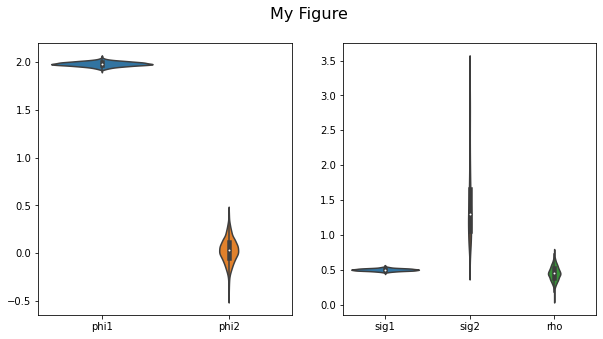

In [ ]:
# Set the default figure size
plt.rcParams["figure.figsize"] = (10, 5)
# Create a figure with one row and two columns
fig, axs = plt.subplots(1,2)

# the first fig
# Create a dataframe with the data
df1 = pd.DataFrame({'phi1': phi1, 'phi2': phi2})
# Plot the violin plot
sns.violinplot(data=df1,ax=axs[0])

# the second fig
# Create a dataframe with the data
df2 = pd.DataFrame({'sig1':sig1,'sig2':sig2,'rho':rho})
# Plot the violin plot
sns.violinplot(data=df2,ax=axs[1])

# Add a title to the entire figure
fig.suptitle("My Figure",fontsize=16)
# Show the plot
plt.show()

## model2 

In [ ]:
tojags='''
model{
  # convert sig to tau for convenience
  tau <- pow(sig, -2)
  # loop through trials to define likelihood
  for (i in 1:n){
    for (t in 1:Nt){
      # likelihood for neural data
      N[i,t] ~ dnorm(DeltaTheta[i,1]*ts[t],tau); 
    }
    # likelihood for behavioral data
    B[i] ~ dbin(1/(1+exp(-DeltaTheta[i,2])),1);
  } 
  # loop through trials to define prior on (delta, theta)
  for (i in 1:n){
    DeltaTheta[i,1:2] ~ dmnorm(phi,Omega);
  }
  # priors on hyperparameters
  phi ~ dmnorm(phi0,s0);

  # calculate priors for individual elements of Sigma
  sig1 ~ dgamma(0.01,0.01);
  sig2 ~ dgamma(0.01,0.01);
  rho ~ dunif(-1,1);

  # compute Sigma from individual elements above
  Sigma[1,1] <- sig1^2
  Sigma[2,1] <- sig1*sig2*rho
  Sigma[1,2] <- Sigma[2,1]
  Sigma[2,2] <- sig2^2

  # convert Omega to Sigma for convenience
  Omega <- inverse(Sigma);
}
'''

## model3

In [ ]:
tojags='''
model{
  # convert sig to tau for convenience
  tau <- pow(sig, -2)
  # loop through trials to define likelihood
  for (i in 1:n){
    for (t in 1:Nt){
      for (k in 1:Nroi){
        # likelihood for neural data
        N[i,t,k] ~ dnorm(DeltaTheta[i,k]*ts[t],tau); 
        }
      }
    # likelihood for behavioral data
    B[i] ~ dbin(1/(1+exp(-DeltaTheta[i,(Nroi+1)])),1);
  } 
  # loop through trials to define prior on (delta, theta)
  for (i in 1:n){
    DeltaTheta[i,1:(Nroi+1)] ~ dmnorm(phi,Omega);
  }
  # priors on hyperparameters
  phi ~ dmnorm(phi0,s0);
  Omega <- dwish(I0,n0);

  # convert Omega to Sigma for convenience
  Sigma <- inverse(Omega);
}
'''

## model4

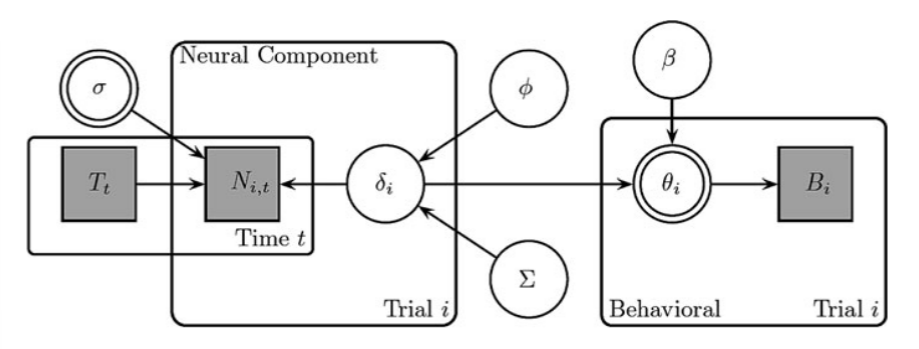

$\delta_{i,k} \sim N_p(\phi,\Sigma)$

$\theta_i = \sum_{k}\delta_{i,k}\beta_k$

In [ ]:
# total number of rois
Nroi = 2

# declare some storage objects
N = np.full((n,len(ts),Nroi),np.nan)
B = np.full(n,np.nan)
theta = np.full(n,np.nan)

# set up regression parameters
beta = np.array([[0.5,0.3]])

Delta = np.random.multivariate_normal([2,0],[[1,0],[0,1]],n)

# loop over trials
for i in range(n):
  for k in range(Nroi):
    # N is a normal deviate with mean controlled by delta
    N[i,:,k] = np.random.normal(Delta[i,k]*ts,sig,len(ts))
  # theta[i] is the single-trial behavioral parameter
  theta[i] = Delta[i,:]@beta.T
  # B is a Bernoulli deviate with probability controlled by theta
  B[i] = np.random.binomial(n = 1,p=1/(1+np.exp(-theta[i])),size = 1)

In [ ]:
tojags='''
model{
  # convert sig to tau for convenience
  tau <- pow(sig, -2)
  # loop through trials to define likelihood
  for (i in 1:n){
    for (t in 1:Nt){
      for (k in 1:Nroi){
        # likelihood for neural data
        N[i,t,k] ~ dnorm(Delta[i,k]*ts[t],tau); 
        }
      }
    theta[i] <- Delta[i,]%*%beta
    # likelihood for behavioral data
    B[i] ~ dbin(1/(1+exp(-theta[i])),1);
  } 
  # loop through trials to define prior on (delta, theta)
  for (i in 1:n){
    Delta[i,1:Nroi] ~ dmnorm(phi,Omega);
  }
  # priors on hyperparameters
  phi ~ dmnorm(phi0,s0);
  Omega ~ dwish(I0,n0);

  # convert Omega to Sigma for convenience
  Sigma <- inverse(Omega);

  # prior on regression parameters
  for(k  in 1:Nroi){
    beta[k]~dnorm(0,0.001)
  }
}
'''

In [ ]:
modelfile = '/content/simpleCPP_test4.jags'
f = open(modelfile, 'w')
f.write(tojags)
f.close()

In [ ]:
trackvars = ['phi','Sigma','Delta','beta']

In [ ]:
jags = pyjags.Model(file=modelfile,
           data=dict(n=n,
                B=B,
                N=N,
                ts=ts,
                Nt=len(ts),
                Nroi=2,
                sig=sig,
                I0=np.diag(np.ones(2) * 2),
                n0=2,
                phi0=[0]*2,
                s0=np.diag(np.ones(2) * 2)),
           chains=1,
           adapt=1000, 
           threads=6,
           progress_bar=True
           )
samples = jags.sample(20000,vars=trackvars,thin=10)

adapting: iterations 652 of 1000, elapsed 0:00:05, remaining 0:00:03
adapting: iterations 1000 of 1000, elapsed 0:00:08, remaining 0:00:00
sampling: iterations 2197 of 20000, elapsed 0:00:09, remaining 0:01:12
sampling: iterations 4666 of 20000, elapsed 0:00:20, remaining 0:01:07
sampling: iterations 5817 of 20000, elapsed 0:00:26, remaining 0:01:04
sampling: iterations 6930 of 20000, elapsed 0:00:33, remaining 0:01:02
sampling: iterations 9066 of 20000, elapsed 0:00:42, remaining 0:00:51
sampling: iterations 10139 of 20000, elapsed 0:00:47, remaining 0:00:46
sampling: iterations 11208 of 20000, elapsed 0:00:55, remaining 0:00:43
sampling: iterations 13265 of 20000, elapsed 0:01:03, remaining 0:00:32
sampling: iterations 15371 of 20000, elapsed 0:01:12, remaining 0:00:22
sampling: iterations 17524 of 20000, elapsed 0:01:22, remaining 0:00:12
sampling: iterations 18592 of 20000, elapsed 0:01:29, remaining 0:00:07
sampling: iterations 20000 of 20000, elapsed 0:01:37, remaining 0:00:00
sa

In [ ]:
# compute the posterior of beta 
beta0 = samples['beta'][0,:,0]
beta1 = samples['beta'][1,:,0]

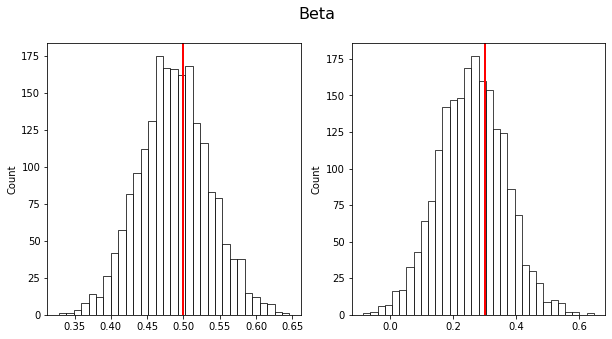

In [ ]:
# Set the default figure size
plt.rcParams["figure.figsize"] = (10, 5)
# Create a figure with one row and two columns
fig, axs = plt.subplots(1,2)

# the first fig
# Plot the hist
sns.histplot(beta0,color='white',ax=axs[0])
# Add the vline of 0.5
axs[0].axvline(x=0.5, color='r', linewidth=2)


# the second fig
# Plot the hist
sns.histplot(beta1,color='white',ax=axs[1])
# Add the vline of 0.3
axs[1].axvline(x=0.3, color='r', linewidth=2)

# Add a title to the entire figure
fig.suptitle("Beta",fontsize=16)
# Show the plot
plt.show()
